In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter), will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 


import datetime


from sklearn.model_selection import train_test_split 


from sklearn.metrics import classification_report , ConfusionMatrixDisplay

In [3]:
train =pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
test=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')


* Latitude range: [0:34] ( General range is -90 to 90 )
* Longitude range: [-118: 0] (General range is 180 to 180)



In [4]:
def day_category(x):
    if 400<=x<1200:
        return 'Morning'
    elif 1200<=x<1700:
        return 'Daytime'
    elif 1800<=x<2100:
        return 'Evening'
    else:
        return 'Night'

In [5]:
train['day_category']=train['Time_Occurred'].apply(day_category )

In [6]:

def extract_date(d):
    str(d)
    date=d.split(' ')[0]
    
    
    date=pd.to_datetime(date).date()
    
    
    return date
    

In [7]:
train['Date_Reported']=train['Date_Reported'].apply(extract_date)
train['Date_Occurred']=train['Date_Occurred'].apply(extract_date)


In [8]:
k=train['Date_Reported'][0]-train['Date_Occurred'][0]
k.days

3

In [9]:
train['Date_Reported']=pd.to_datetime(train['Date_Reported']).dt.date
train['Date_Occurred']=pd.to_datetime(train['Date_Occurred']).dt.date

train['reporting_delay_day_count']=(train['Date_Reported']-train['Date_Occurred'])

In [10]:
def day_count(d):
    return d.days
train['reporting_delay_day_count']=train['reporting_delay_day_count'].apply(day_count)

In [11]:
df=train[['Latitude','Longitude','reporting_delay_day_count','day_category','Victim_Age','Victim_Sex','Victim_Descent','Premise_Code','Weapon_Description','Weapon_Used_Code','Area_ID','Modus_Operandi','Part 1-2','Status','Crime_Category']]

In [12]:
def victim_gender(val):
    if val=='H' or pd.isna(val):
        val='X'
    return val


df.loc[:,'Victim_Sex'] = df['Victim_Sex'].apply(victim_gender)

In [13]:
unique_values_weapon=pd.DataFrame(df['Weapon_Description'])
unique_values_weapon.value_counts(normalize=True)

Weapon_Description                            
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    0.543967
UNKNOWN WEAPON/OTHER WEAPON                       0.107566
VERBAL THREAT                                     0.074438
HAND GUN                                          0.052897
KNIFE WITH BLADE 6INCHES OR LESS                  0.021813
SEMI-AUTOMATIC PISTOL                             0.020995
UNKNOWN FIREARM                                   0.017860
OTHER KNIFE                                       0.017042
VEHICLE                                           0.011452
MACE/PEPPER SPRAY                                 0.010907
ROCK/THROWN OBJECT                                0.008589
BOTTLE                                            0.007498
PIPE/METAL PIPE                                   0.007089
CLUB/BAT                                          0.006953
STICK                                             0.006680
KITCHEN KNIFE                                     0.006135
KNIFE WIT

In [14]:
distribution = df['Weapon_Description'].dropna().value_counts(normalize=True)

missing = df['Weapon_Description'].isnull().sum()

imputed_values = np.random.choice(distribution.index, size=missing, p=distribution.values)

# Impute the missing values
df.loc[df['Weapon_Description'].isnull(), 'Weapon_Description'] = imputed_values


In [15]:
distribution = df['Victim_Descent'].dropna().value_counts(normalize=True)

missing = df['Victim_Descent'].isnull().sum()

imputed_values = np.random.choice(distribution.index, size=missing, p=distribution.values)

# Impute the missing values
df.loc[df['Victim_Descent'].isnull(), 'Victim_Descent'] = imputed_values

 df.drop('Weapon_Used_Code',inplace=True,axis=1)

In [16]:
df.drop('Weapon_Used_Code',inplace=True,axis=1)


/tmp/ipykernel_18/3662583146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Weapon_Used_Code',inplace=True,axis=1)


In [17]:
# def number_of_activities(s):
#     activities=[]
#     s=str(s)
#     a=s.split(' ')
#     for i in a:
#         if a not in activities:
#             activities.append(a)
#     return activities

def number_of_activities(s):
    if pd.isna(s):  # Handle NaN values
        return ''
    activities = set()  # Using a set to avoid duplicates efficiently
    for activity in s.split(' '):
        activities.add(str(activity))
    activities=' '.join(activities)    
    return activities
df.loc[:,'Modus_Operandi']=df['Modus_Operandi'].apply(number_of_activities)
# df.drop('Modus_Operandi',axis=1)
# df['Modus_Operandi']=df['unique_activities']
# df.drop('unique_activities',axis=1,inplace=True)

In [18]:
df.loc[:,'max_activity']=df['Modus_Operandi'].apply(lambda x: len(x))

/tmp/ipykernel_18/3589716598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'max_activity']=df['Modus_Operandi'].apply(lambda x: len(x))


In [19]:
df.loc[:,'Premise_Code']=df['Premise_Code'].apply(lambda x : int(x))

In [20]:
df.loc[:,'Area_ID']=df['Area_ID'].apply(lambda x : int(x))
df.loc[:,'Part 1-2']=df['Part 1-2'].apply(lambda x : int(x))


In [21]:
df.loc[df['Victim_Age']<0,'Victim_Age']=0

In [22]:
df.loc[df['Victim_Age']==0,'Victim_Age']=df['Victim_Age'].mean()

In [23]:
df['Part 1-2'].value_counts()

Part 1-2
1.0    11637
2.0     8363
Name: count, dtype: int64

In [24]:
df.loc[:,'Part 1-2']=df['Part 1-2'].apply(lambda x: int(x))

In [25]:
df.loc[:,'Victim_Age']=df['Victim_Age'].apply(lambda x: int(x))

In [26]:
df.drop('max_activity',axis=1,inplace=True)

/tmp/ipykernel_18/876014097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('max_activity',axis=1,inplace=True)


In [27]:

df.loc[df['Weapon_Description'] == 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'Weapon_Description'] = 'Physical Force'


In [28]:

def gun(s):
    t=s.replace('/',' ')
    listt=t.split(' ' or '/')
    gun_keywords=['gun','pistol','revolver','rifle','shotgun']
    
    sharp_heavy_object=['blade','stone','knife','metal','screwdriver','cleaver', 'glass','machete' ,'iron' , 'cutting','axe' ,'instrument','hammer','weapon','object','bottle','weapons','brass','scissors']
    
    other_weapon = ['bomb','threat', 'demand', 'poison', 'ice', 'scalding', 'board','block' ,'brick', 'stick', 'bat', 'spray']
    
    physical_presence=['physical','presence']
    
    fire=['firearm' , 'fire' ]

    for i in listt:
        if i.lower() in gun_keywords:
            return 'Gun'
        elif i.lower() in sharp_heavy_object:
            return 'sharp_heavy_object'
        
        elif i.lower() in fire:
            return 'fire'
        elif i.lower() in other_weapon:
            return 'other_weapon'
        elif i.lower() in physical_presence:
            return 'Physical Force'
        
    return s
    



df.loc[:,'Weapon_Description']=df['Weapon_Description'].apply(gun)

In [29]:
len(df['Premise_Code'].value_counts())

217

In [30]:
len(df['Area_ID'].value_counts())

21

In [31]:
numeric_columns=[['Latitude','Longitude','reporting_delay_day_count','Victim_Age']]
categorical_columns=[['day_category','Victim_Sex','Victim_Descent','Premise_Code','Area_ID','Part 1-2','Status']] #ohe
multilabel_binarizer=[['Modus_Operandi']] 


In [32]:
y=df['Crime_Category']

df.drop('Crime_Category',axis=1,inplace=True)

/tmp/ipykernel_18/448365884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Crime_Category',axis=1,inplace=True)


In [33]:
df.drop('Premise_Code',axis=1,inplace=True)

/tmp/ipykernel_18/1308723833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Premise_Code',axis=1,inplace=True)


In [34]:
from sklearn.model_selection import train_test_split

xtrain, xtest ,ytrain , ytest= train_test_split(df , y , test_size=0.2 , random_state=42 , shuffle=True ,stratify = y  )

In [35]:
print(xtrain.shape) 
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(16000, 12)
(16000,)
(4000, 12)
(4000,)


In [36]:
from sklearn.dummy import DummyClassifier

dummy_clf=DummyClassifier(random_state=42 , strategy="most_frequent")
dummy_clf.fit(xtrain, ytrain)
print('Dummy train score', dummy_clf.score(ytrain,ytrain))
print('Dummy predicted train score', dummy_clf.score(xtrain,dummy_clf.predict(xtrain)))

print('Dummy test score', dummy_clf.score(xtest, ytest))

print('Dummy predicted test score', dummy_clf.score(xtest, dummy_clf.predict(xtest)))

Dummy train score 0.5833125
Dummy predicted train score 1.0
Dummy test score 0.58325
Dummy predicted test score 1.0


Logistic 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude                   20000 non-null  float64
 1   Longitude                  20000 non-null  float64
 2   reporting_delay_day_count  20000 non-null  int64  
 3   day_category               20000 non-null  object 
 4   Victim_Age                 20000 non-null  float64
 5   Victim_Sex                 20000 non-null  object 
 6   Victim_Descent             20000 non-null  object 
 7   Weapon_Description         20000 non-null  object 
 8   Area_ID                    20000 non-null  float64
 9   Modus_Operandi             20000 non-null  object 
 10  Part 1-2                   20000 non-null  float64
 11  Status                     20000 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.8+ MB


In [38]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer

class MultiLabelBinarizerWrapper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        self.mlb.fit(X)
        return self

    def transform(self, X):
        return self.mlb.transform(X)

In [40]:

from sklearn.preprocessing import StandardScaler , OneHotEncoder  , MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
ct=ColumnTransformer(transformers=[
    
    ('numerical_cols' , StandardScaler(),['Latitude','Longitude','reporting_delay_day_count','Victim_Age']),
    ('categorical_cols' , OneHotEncoder(handle_unknown='ignore'),['day_category','Victim_Sex','Victim_Descent','Part 1-2','Area_ID','Status','Weapon_Description']),
    ('multi_label_binarizer', MultiLabelBinarizerWrapper(), 'Modus_Operandi')
])
    

In [41]:
len(df['Area_ID'].value_counts())

21

In [42]:
pipe_logistic = Pipeline(steps=[('ct',ct),('logistic_reg',LogisticRegression(solver='saga',C=0.1,warm_start=True, max_iter=1500 ,random_state=42))])

In [43]:
# pipe_logistic_sag = Pipeline(steps=[('ct',ct),('logistic_reg',LogisticRegressionCV(solver='sag',penalty='l2',multi_class='ovr', max_iter=2000 ,random_state=42))])

# pipe_logistic_sag.fit(xtrain,ytrain)

# pipe_logistic_sag.score(xtest,ytest)

In [44]:
pipe_logistic.fit(xtrain,ytrain)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('numerical_cols',
                                                  StandardScaler(),
                                                  ['Latitude', 'Longitude',
                                                   'reporting_delay_day_count',
                                                   'Victim_Age']),
                                                 ('categorical_cols',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['day_category', 'Victim_Sex',
                                                   'Victim_Descent', 'Part 1-2',
                                                   'Area_ID', 'Status',
                                                   'Weapon_Description']),
                                                 ('multi_label_binarizer',
                                                  MultiLabelBinarizerWrapper(),
                                                  'Modus_Operandi')])),
                ('logistic_reg',
                 LogisticRegression(C=0.1, max_iter=1500, random_state=42,
                                    solver='saga', warm_start=True))])

In [45]:
pipe_logistic.score(xtest,ytest)

0.8115

In [46]:
# from sklearn.metrics import make_scorer ,f1_score
# logCV_scorer=make_scorer(f1_score , average='auto')
# pipe_logistic_multiclass = Pipeline(steps=[('ct',ct),('logistic_reg',LogisticRegressionCV(cv=3,penalty='l2',solver='saga',multi_class='multinomial',Cs=[0.1, 0.5, 1] ,max_iter=3000 ,random_state=42))])

# pipe_logistic_multiclass.fit(xtrain,ytrain)
# pipe_logistic_multiclass.score(xtrain,ytrain)

# pipe_logistic_multiclass.score(xtest,ytest)




# # 0.81175


In [47]:
# from sklearn.metrics import make_scorer ,f1_score
# logCV_scorer=make_scorer(f1_score , average='auto')
# pipe_logistic_ovr = Pipeline(steps=[('ct',ct),('logistic_reg',LogisticRegressionCV(cv=5,penalty='l2',solver='liblinear',multi_class='ovr',Cs=[0.1, 0.5, 1] ,max_iter=2400 ,random_state=42))])
# pipe_logistic_ovr.fit(xtrain,ytrain)
# pipe_logistic_ovr.score(xtest,ytest)






# # 0.805

In [48]:
# from sklearn.model_selection import GridSearchCV
# grid_logistic_estimator=Pipeline(steps=[('ct',ct),('logistic',LogisticRegression(random_state=42,penalty='l2',multi_class='multinomial' , max_iter=2500))])

# param_grid_logistic={
    
#     'logistic__C':[0.01 , 0.1 , 1 , 10],
    
#     'logistic__solver':['sag', 'saga'],
    
# #     'logistic__penalty':['l2'] ,
  
# #     'logistic__max_iter' : [1000 , 1200 , 1500]
# }

# grid_logistic=GridSearchCV(grid_logistic_estimator, param_grid=param_grid_logistic , cv=5 ,n_jobs=-1)


# grid_logistic.fit(xtrain , ytrain)



# grid_logistic.score(xtest,ytest)



# # 0.81225

In [49]:
# grid_logistic.best_params_


# # {'logistic__C': 10, 'logistic__solver': 'sag'}

In [50]:
from sklearn.svm import SVC , NuSVC
pipe_svc=Pipeline(steps=[('ct',ct),('svc',SVC(decision_function_shape='ovr'))])

In [51]:
pipe_svc.fit(xtrain,ytrain)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('numerical_cols',
                                                  StandardScaler(),
                                                  ['Latitude', 'Longitude',
                                                   'reporting_delay_day_count',
                                                   'Victim_Age']),
                                                 ('categorical_cols',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['day_category', 'Victim_Sex',
                                                   'Victim_Descent', 'Part 1-2',
                                                   'Area_ID', 'Status',
                                                   'Weapon_Description']),
                                                 ('multi_label_binarizer',
                                                  MultiLabelBinarizerWrapper(),
                                                  'Modus_Operandi')])),
                ('svc', SVC())])

In [52]:
pipe_svc.score(xtest,ytest)

0.847

In [53]:
# from sklearn.linear_model import Perceptron

# pipe_percep=Pipeline(steps=[('ct',ct),('perceptron',Perceptron())])

# pipe_percep.fit(xtrain,ytrain)

# pipe_percep.score(xtest,ytest)

KNN

KNN Grid

Train score =  0.8481875
Test score =  0.809
---------------------------------------------------------
                               precision    recall  f1-score   support

       Crimes against Persons       0.77      0.22      0.34        45
  Crimes against Public Order       0.67      0.39      0.49       362
Fraud and White-Collar Crimes       0.74      0.59      0.66       271
                 Other Crimes       0.00      0.00      0.00        36
              Property Crimes       0.86      0.94      0.90      2333
               Violent Crimes       0.73      0.77      0.75       953

                     accuracy                           0.81      4000
                    macro avg       0.63      0.49      0.52      4000
                 weighted avg       0.79      0.81      0.79      4000

---------------------------------------------------------


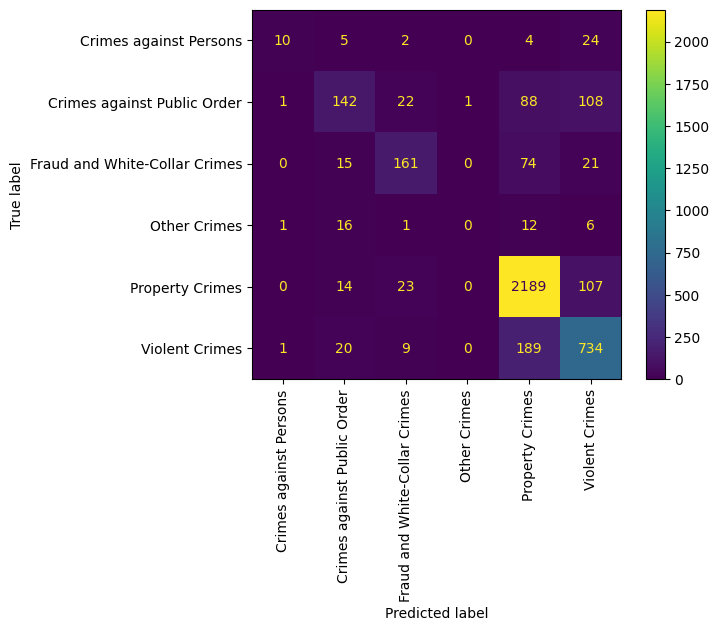

In [54]:
from sklearn.neighbors import KNeighborsClassifier

#45  33-8077   29-81  28  27  20  16  14 12 10
kn_classifier=Pipeline(steps=[('ct' , ct ),( 'knn' ,KNeighborsClassifier(n_neighbors=9))])


kn_classifier.fit(xtrain , ytrain)


ypred_kn_classifier=kn_classifier.predict(xtest)



print("Train score = ",kn_classifier.score(xtrain,ytrain))
print("Test score = ",kn_classifier.score(xtest,ytest))

print('---------------------------------------------------------')
print(classification_report(ytest,ypred_kn_classifier))

print('---------------------------------------------------------')

print(ConfusionMatrixDisplay.from_estimator(kn_classifier , xtest , ytest ,xticks_rotation='vertical'))


In [55]:
import time
start_time = time.time()
# from sklearn.metrics import pairwise_distances
from sklearn.model_selection import  RepeatedStratifiedKFold ,GridSearchCV ,RandomizedSearchCV

from sklearn.decomposition import PCA



# knn_param_grid= {
    
#     "knn__n_neighbors":[9,12,16 ,20],
    
#     "knn__weights":['uniform','distance'],
    
# #     'knn__algorithm':['ball_tree','kd_tree'],
    
#     'knn__leaf_size':[19,20,30,25],
#     'knn__p':[1,2]
# #     'knn__metric':['euclidean','manhattan'] 
# }


# kn_classifier_grid_est=Pipeline(steps=[('ct' , ct ),( 'knn' ,KNeighborsClassifier())])

# cv=RepeatedStratifiedKFold(n_splits=5 , n_repeats = 4 , random_state=42)

# # kn_classifier_grid = GridSearchCV(kn_classifier_grid_est, param_grid=knn_param_grid , n_jobs=-1 , cv=cv , scoring='accuracy' , error_score=0)
# kn_classifier_Randomgrid = RandomizedSearchCV(kn_classifier_grid_est, param_distributions=knn_param_grid , n_jobs=-1 , cv=cv , scoring='accuracy' , error_score=0)

# # kn_classifier_grid.fit(xtrain , ytrain)
# kn_classifier_Randomgrid.fit(xtrain , ytrain)

# kn_classifier_Randomgrid.score(xtrain,ytrain)
# kn_classifier_Randomgrid.score(xtest,ytest)

# end_time = time.time()
# print("elapsed_time = ",(end_time - start_time)//60)












In [56]:
# kn_classifier_grid = GridSearchCV(kn_classifier_grid_est, param_grid=knn_param_grid , n_jobs=-1 , cv=cv , scoring='accuracy' , error_score=0)
# kn_classifier_grid.fit(xtrain , ytrain)


Train score =  1.0
Test score =  0.81675
---------------------------------------------------------
                               precision    recall  f1-score   support

       Crimes against Persons       0.83      0.11      0.20        45
  Crimes against Public Order       0.79      0.38      0.51       362
Fraud and White-Collar Crimes       0.83      0.61      0.70       271
                 Other Crimes       0.00      0.00      0.00        36
              Property Crimes       0.86      0.95      0.90      2333
               Violent Crimes       0.72      0.79      0.75       953

                     accuracy                           0.82      4000
                    macro avg       0.67      0.47      0.51      4000
                 weighted avg       0.81      0.82      0.80      4000

---------------------------------------------------------


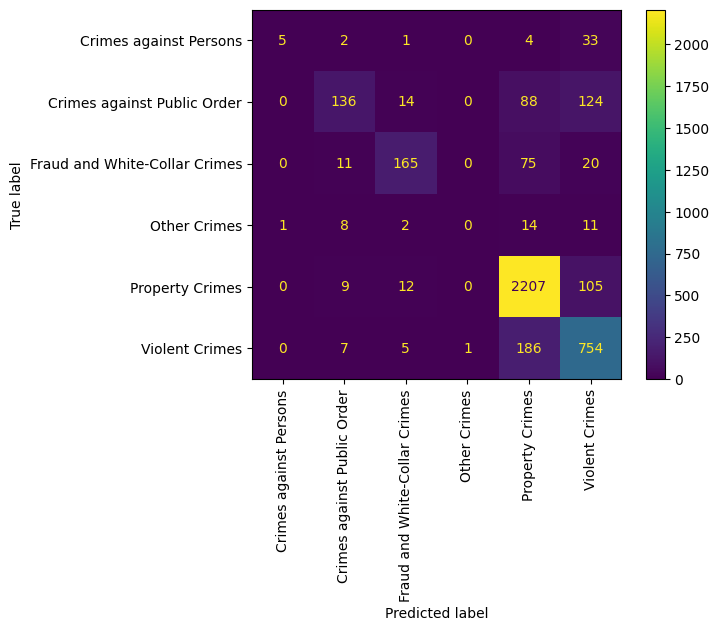

In [57]:
   #n= 16
kn_classifier_tuned=Pipeline(steps=[('ct' , ct ),( 'knn' ,KNeighborsClassifier(n_neighbors=19 , p=1,leaf_size=19 ,weights='distance'))])


kn_classifier_tuned.fit(xtrain , ytrain)


ypred_kn_classifier_tuned=kn_classifier_tuned.predict(xtest)



print("Train score = ",kn_classifier_tuned.score(xtrain,ytrain))
print("Test score = ",kn_classifier_tuned.score(xtest,ytest))

print('---------------------------------------------------------')
print(classification_report(ytest,ypred_kn_classifier_tuned))

print('---------------------------------------------------------')

print(ConfusionMatrixDisplay.from_estimator(kn_classifier_tuned , xtest , ytest ,xticks_rotation='vertical'))


##### Test 


In [58]:
test=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')
test['day_category']=test['Time_Occurred'].apply(day_category )


test['Date_Reported']=test['Date_Reported'].apply(extract_date)
test['Date_Occurred']=test['Date_Occurred'].apply(extract_date)






test['Date_Reported']=pd.to_datetime(test['Date_Reported']).dt.date
test['Date_Occurred']=pd.to_datetime(test['Date_Occurred']).dt.date

test['reporting_delay_day_count']=(test['Date_Reported']-test['Date_Occurred'])






def day_count(d):
    return d.days
test['reporting_delay_day_count']=test['reporting_delay_day_count'].apply(day_count)






def victim_gender(val):
    if val=='H' or pd.isna(val):
        val='X'
    return val


test.loc[:,'Victim_Sex'] = test['Victim_Sex'].apply(victim_gender)





unique_values_weapon_test=pd.DataFrame(test['Weapon_Description'])
unique_values_weapon_test.value_counts(normalize=True)







distribution_test = test['Weapon_Description'].dropna().value_counts(normalize=True)

missing_test = test['Weapon_Description'].isnull().sum()

imputed_values_test = np.random.choice(distribution_test.index, size=missing_test, p=distribution_test.values)

# Impute the missing values
test.loc[test['Weapon_Description'].isnull(), 'Weapon_Description'] = imputed_values_test



In [59]:
test.isnull().sum()

Location                        0
Cross_Street                 4190
Latitude                        0
Longitude                       0
Date_Reported                   0
Date_Occurred                   0
Time_Occurred                   0
Area_ID                         0
Area_Name                       0
Reporting_District_no           0
Part 1-2                        0
Modus_Operandi                684
Victim_Age                      0
Victim_Sex                      0
Victim_Descent                643
Premise_Code                    0
Premise_Description             1
Weapon_Used_Code             3153
Weapon_Description              0
Status                          0
Status_Description              0
day_category                    0
reporting_delay_day_count       0
dtype: int64

In [60]:
distribution_test = test['Victim_Descent'].dropna().value_counts(normalize=True)

missing_test = test['Victim_Descent'].isnull().sum()

imputed_values_test = np.random.choice(distribution_test.index, size=missing_test, p=distribution_test.values)

# Impute the missing values
test.loc[test['Victim_Descent'].isnull(), 'Victim_Descent'] = imputed_values_test

In [61]:
test['Modus_Operandi']=test['Modus_Operandi'].apply(number_of_activities)
test['Part 1-2']=test['Part 1-2'].apply(lambda x : int(x))
test['Victim_Age']=test['Victim_Age'].apply(lambda x: int(x))

In [62]:
test.loc[test['Weapon_Description'] == 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'Weapon_Description'] = 'Physical Force'



test.loc[:,'Weapon_Description']=test['Weapon_Description'].apply(gun)

In [63]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 6735 to 554
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude                   16000 non-null  float64
 1   Longitude                  16000 non-null  float64
 2   reporting_delay_day_count  16000 non-null  int64  
 3   day_category               16000 non-null  object 
 4   Victim_Age                 16000 non-null  float64
 5   Victim_Sex                 16000 non-null  object 
 6   Victim_Descent             16000 non-null  object 
 7   Weapon_Description         16000 non-null  object 
 8   Area_ID                    16000 non-null  float64
 9   Modus_Operandi             16000 non-null  object 
 10  Part 1-2                   16000 non-null  float64
 11  Status                     16000 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.6+ MB


In [64]:
test=test[['Latitude','Longitude','reporting_delay_day_count','day_category','Area_ID','Victim_Age','Victim_Sex','Modus_Operandi','Victim_Descent','Part 1-2','Weapon_Description','Status']]

In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude                   5000 non-null   float64
 1   Longitude                  5000 non-null   float64
 2   reporting_delay_day_count  5000 non-null   int64  
 3   day_category               5000 non-null   object 
 4   Area_ID                    5000 non-null   float64
 5   Victim_Age                 5000 non-null   int64  
 6   Victim_Sex                 5000 non-null   object 
 7   Modus_Operandi             5000 non-null   object 
 8   Victim_Descent             5000 non-null   object 
 9   Part 1-2                   5000 non-null   int64  
 10  Weapon_Description         5000 non-null   object 
 11  Status                     5000 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 468.9+ KB


In [66]:
test

,Latitude,Longitude,reporting_delay_day_count,day_category,Area_ID,Victim_Age,Victim_Sex,Modus_Operandi,Victim_Descent,Part 1-2,Weapon_Description,Status
0,34.0128,-118.3045,0,Evening,3.0,28,F,2000 0416 1243 1241 1821 1813,H,2,Physical Force,IC
1,34.0726,-118.3029,37,Night,20.0,26,M,0394 0344,B,1,Physical Force,IC
2,33.9348,-118.2695,1,Morning,18.0,62,F,1914 1822 0355 0701 1202 0100,B,2,other_weapon,IC
3,34.0497,-118.3442,20,Night,7.0,0,X,,B,1,Physical Force,IC
4,34.1611,-118.3704,1,Night,15.0,37,F,1501,W,2,Physical Force,AO
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,34.0409,-118.3408,1,Night,7.0,0,X,,H,1,Gun,IC
4996,34.0347,-118.2253,7,Daytime,4.0,0,X,1300 0325,X,1,Physical Force,IC
4997,34.2392,-118.4698,0,Night,19.0,38,M,1817 0416 0913,H,2,Physical Force,AA
4998,34.0453,-118.2443,1,Night,1.0,41,M,0416,B,2,sharp_heavy_object,AO


In [67]:
test.shape

(5000, 12)

In [68]:
sample=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv')
sample

,ID,Crime_Category,Unnamed: 2
0,1,Crimes against Persons,NaN
1,2,Crimes against Public Order,NaN
2,3,Other Crimes,NaN
3,4,Crimes against Public Order,NaN
4,5,Other Crimes,NaN
...,...,...,...
995,996,Fraud and White-Collar Crimes,NaN
996,997,Property Crimes,NaN
997,998,Violent Crimes,NaN
998,999,Property Crimes,NaN


In [69]:
test.isnull().sum()

Latitude                     0
Longitude                    0
reporting_delay_day_count    0
day_category                 0
Area_ID                      0
Victim_Age                   0
Victim_Sex                   0
Modus_Operandi               0
Victim_Descent               0
Part 1-2                     0
Weapon_Description           0
Status                       0
dtype: int64

In [70]:
y_pred=kn_classifier_tuned.predict(test)
submission=pd.DataFrame({'ID': np.arange(1,5000+1), 'Crime_Category': y_pred})

submission.to_csv('submission.csv',index=False)